<a href="https://colab.research.google.com/github/tejashreereddyy/FMML-Project-and-Labs/blob/main/AIML_III_Module_3_project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Students Internship Batch of 2024**
# Project : Data Visualization, Choosing K-value and Appreciating Feature Scaling and Standardization

---

Scientists carried out a study to investigate the significance of health-related predictors of diabetes in Pima Indian Women. The study population was females (21 years and above) of Pima Indian heritage.

The purpose of the study was to find out the factors that are associated with the presence of diabetes in Pima Indians.

To find out the reason behind this, we have to first analyze the relationship between different features, such as the number of times a woman was pregnant, their BMI, prevalence of diabetes, etc.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')
from google.colab import files
uploaded = files.upload()

Saving preprocessed_diabetes_data.csv to preprocessed_diabetes_data.csv


In [3]:
diabetes_data = pd.read_csv('preprocessed_diabetes_data.csv')

## TASK-1 :
Find out the "Correlation" between the different attributes present in the data.
Also plot a heatmap (refer Seaborn documentation) for the correlation values obtained.

In [4]:
diabetes_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


Checking if the data is balanced or imbalanced

We can produce a seaborn count plot to check if the output is dominated by one of the classes or not.

Outcome
0    500
1    268
Name: count, dtype: int64


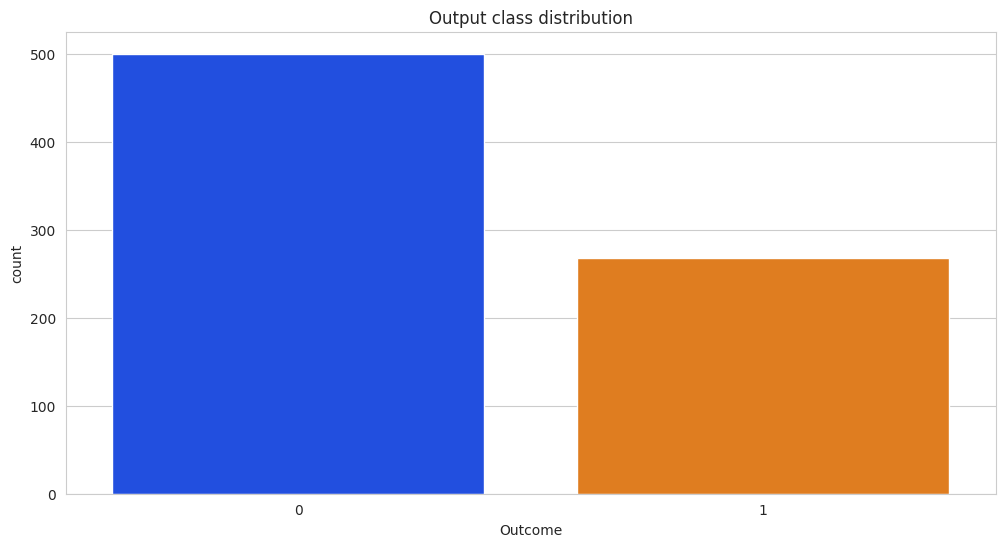

In [5]:
plt.figure(figsize=(12,6))
sns.countplot(x='Outcome',data=diabetes_data, palette='bright')
plt.title("Output class distribution")

print(diabetes_data['Outcome'].value_counts())

Observations

A total of 768 women were registered in the database. 268 women had diabetes, while 500 women did not have diabetes.

The above graph shows that the dataset is biased towards non-diabetic people. The number of non-diabetic people is almost twice the number of diabetic patients.

## TASK-2:
Display a pairplot using Seaborn for the diabetes dataset, with the 'outcome' as the hue.

<Axes: xlabel='Outcome', ylabel='BMI'>

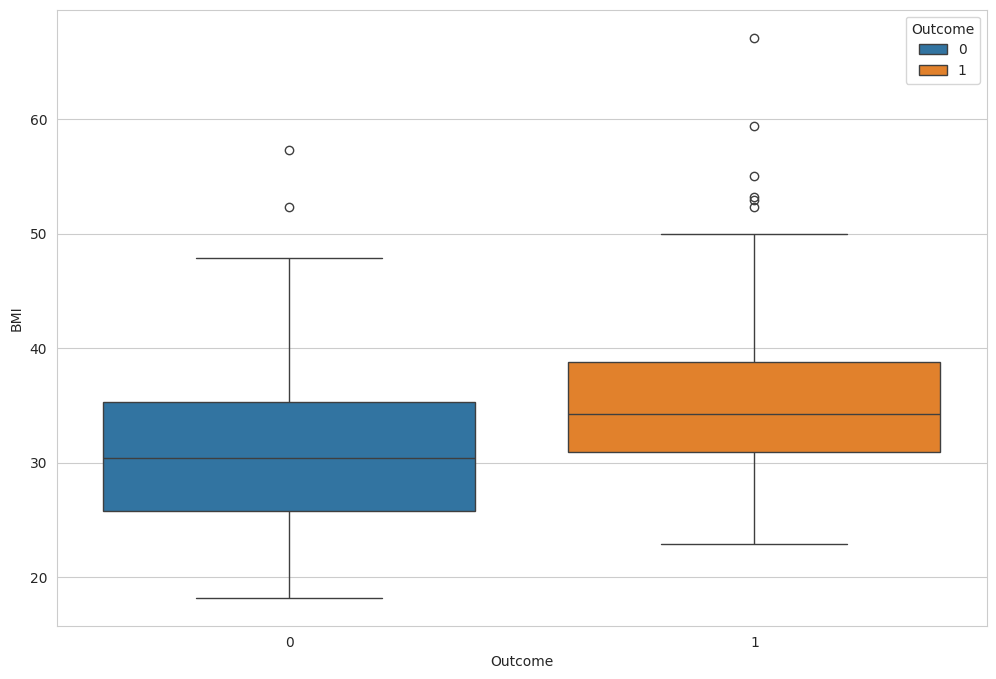

In [6]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='BMI',data=diabetes_data, hue='Outcome')

Observations

It is surprising that the median BMI does not significanty change as the number of pregnancies increases. Those who tested positive for diabetes had higher BMIs than those who did not. However,there is not a very large difference between the medians.

BMI might be higher for women who have had more numbers of pregnancies as well as for those who test positive for diabetes and that the relationship between the pedigree function and the test results will show that those who had a higher pedigree function tested positive and those who had a lower pedigree function tested negative.

## TASK-3:
 Display a boxplot between the Pedigree function and Diabetes.

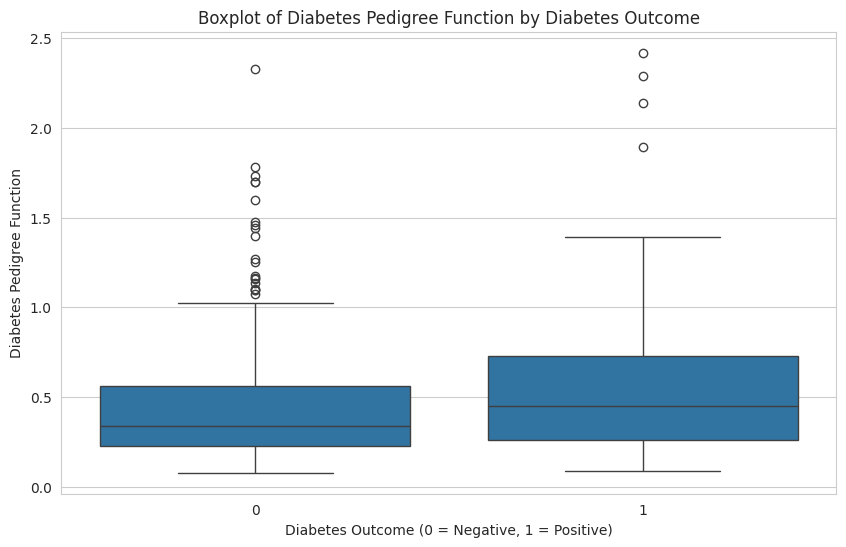

In [8]:
import io
df = pd.read_csv(io.BytesIO(uploaded['preprocessed_diabetes_data.csv']))  # Update the file name if needed

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df)
plt.title('Boxplot of Diabetes Pedigree Function by Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0 = Negative, 1 = Positive)')
plt.ylabel('Diabetes Pedigree Function')
plt.show()

## TASK-4:
 Display a boxplot between the number of Pregnancies and Diabetes.

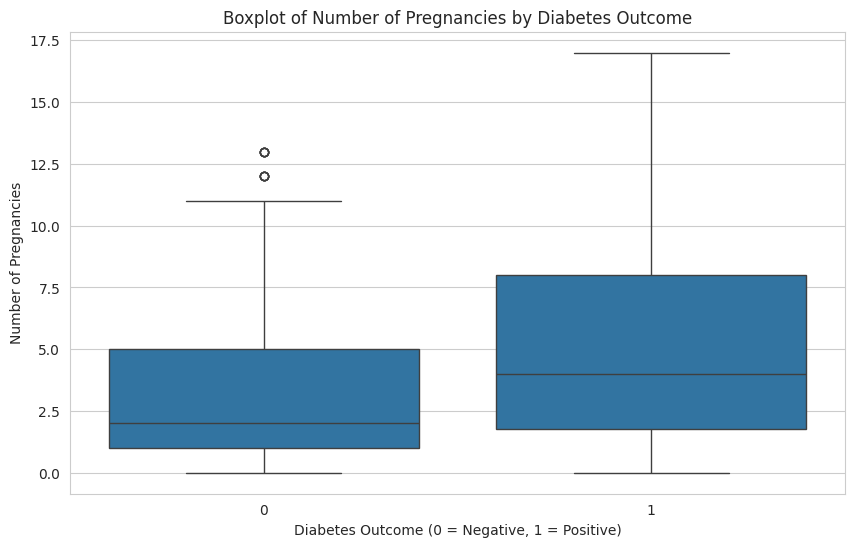

In [9]:
import io
df = pd.read_csv(io.BytesIO(uploaded['preprocessed_diabetes_data.csv']))  # Update the file name if needed

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Pregnancies', data=df)
plt.title('Boxplot of Number of Pregnancies by Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0 = Negative, 1 = Positive)')
plt.ylabel('Number of Pregnancies')
plt.show()

## TASK-5:
Display a boxplot between Age and Diabetes.

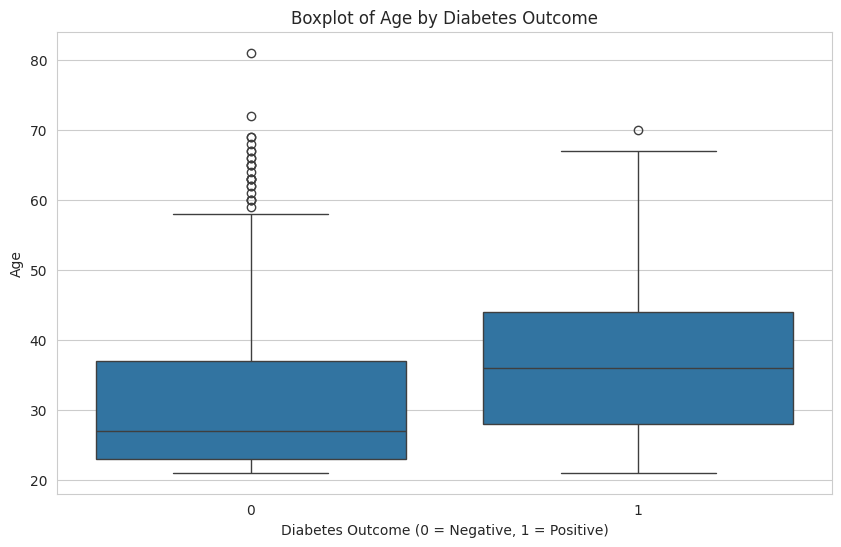

In [10]:
import io
df = pd.read_csv(io.BytesIO(uploaded['preprocessed_diabetes_data.csv']))  # Update the file name if needed

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Age', data=df)
plt.title('Boxplot of Age by Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0 = Negative, 1 = Positive)')
plt.ylabel('Age')
plt.show()

Observations

A significant relation can be seen between the age distribution and occurrence of diabetes. Women at age group > 31 years were at higher risk of getting diabetes in comparison to the younger age group.
###Task 6

In [15]:
def plot_KNN_error_rate(xdata,ydata):
  error_rate = []
  test_scores = []
  train_scores = []

  X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.3, random_state=101)

  for i in range(1,40):
      knn = KNeighborsClassifier(n_neighbors=i)
      knn.fit(X_train, y_train)
      pred_i = knn.predict(X_test)

      error_rate.append(np.mean(pred_i != y_test))
      train_scores.append(knn.score(X_train,y_train))
      test_scores.append(knn.score(X_test,y_test))

  plt.figure(figsize=(12,8))
  plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
          markerfacecolor='red', markersize=10)
  plt.title('Error Rate vs. K Value')
  plt.xlabel('K')
  plt.ylabel('Error Rate')
  print()
  ## score that comes from testing on the same datapoints that were used for training
  max_train_score = max(train_scores)
  train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
  print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))
  print()
  ## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
  max_test_score = max(test_scores)
  test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
  print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

  return test_scores

## TASK-7:
Refer to MinMax Scaler provided in scikit-learn.
Use MinMax scaling on the dataset, and see the performance of KNN on this minmax-scaled dataset.

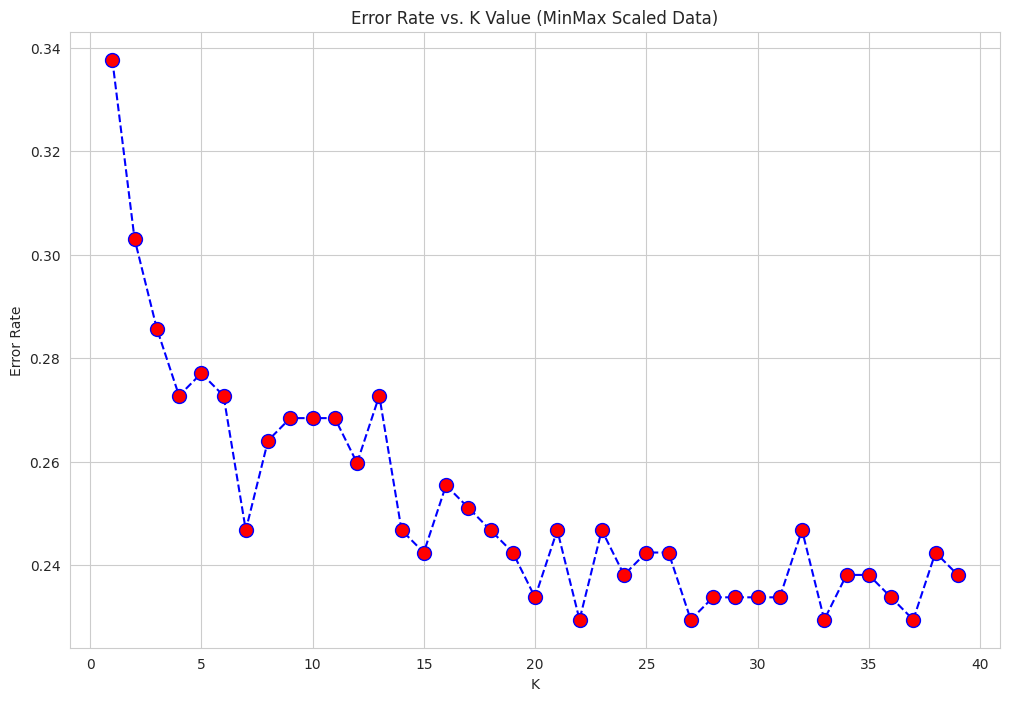

Max train score 100.0 % and k = [1]

Max test score 77.05627705627705 % and k = [22, 27, 33, 37]


[0.6623376623376623,
 0.696969696969697,
 0.7142857142857143,
 0.7272727272727273,
 0.7229437229437229,
 0.7272727272727273,
 0.7532467532467533,
 0.7359307359307359,
 0.7316017316017316,
 0.7316017316017316,
 0.7316017316017316,
 0.7402597402597403,
 0.7272727272727273,
 0.7532467532467533,
 0.7575757575757576,
 0.7445887445887446,
 0.7489177489177489,
 0.7532467532467533,
 0.7575757575757576,
 0.7662337662337663,
 0.7532467532467533,
 0.7705627705627706,
 0.7532467532467533,
 0.7619047619047619,
 0.7575757575757576,
 0.7575757575757576,
 0.7705627705627706,
 0.7662337662337663,
 0.7662337662337663,
 0.7662337662337663,
 0.7662337662337663,
 0.7532467532467533,
 0.7705627705627706,
 0.7619047619047619,
 0.7619047619047619,
 0.7662337662337663,
 0.7705627705627706,
 0.7575757575757576,
 0.7619047619047619]

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# Assuming your dataset is already loaded in 'df'
# Split the data into features (X) and target (y)
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target

# Apply MinMax Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

def plot_KNN_error_rate(xdata, ydata):
    error_rate = []
    test_scores = []
    train_scores = []

    # Split the data into train and test sets in a 70:30 ratio (70% train, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.3, random_state=42)

    for i in range(1, 40):
        # Initialize the KNN classifier with 'i' neighbors
        knn = KNeighborsClassifier(n_neighbors=i)
        # Fit the KNN model on the training set
        knn.fit(X_train, y_train)
        # Make predictions on the test set using KNN
        pred_i = knn.predict(X_test)

        error_rate.append(np.mean(pred_i != y_test))
        train_scores.append(knn.score(X_train, y_train))
        test_scores.append(knn.score(X_test, y_test))

    plt.figure(figsize=(12, 8))
    plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value (MinMax Scaled Data)')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()

    # Max train score
    max_train_score = max(train_scores)
    train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
    print('Max train score {} % and k = {}'.format(max_train_score * 100, list(map(lambda x: x + 1, train_scores_ind))))
    print()
    # Max test score
    max_test_score = max(test_scores)
    test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
    print('Max test score {} % and k = {}'.format(max_test_score * 100, list(map(lambda x: x + 1, test_scores_ind))))

    return test_scores

# Plot KNN error rate and print scores for the MinMax scaled data
plot_KNN_error_rate(X_scaled, y)


## TASK-8:
Plot the voronoi diagram for the TASK-7

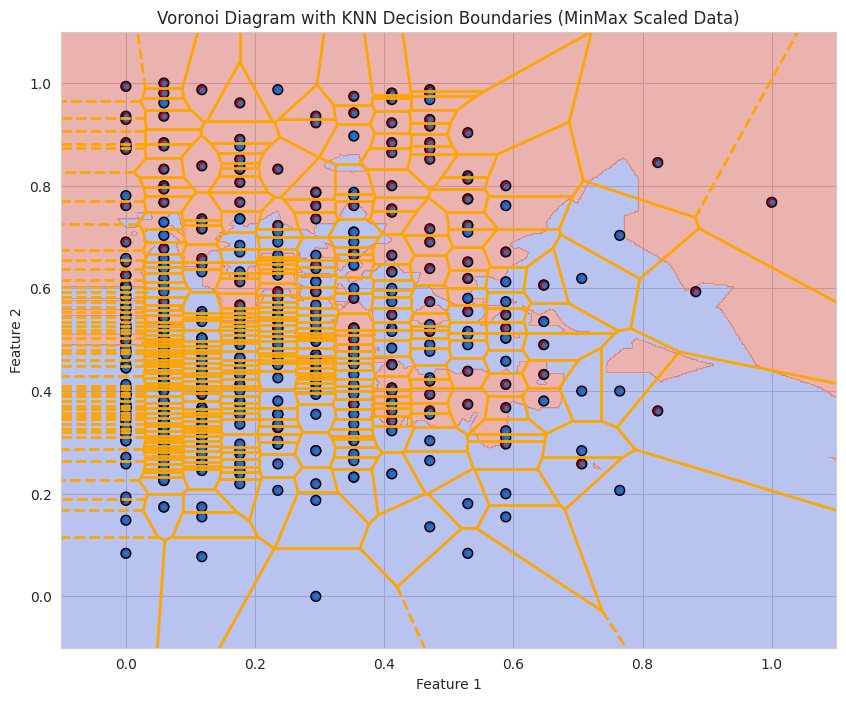

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import Voronoi, voronoi_plot_2d

# Assuming your dataset is already loaded in 'df'
# Split the data into features (X) and target (y)
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target

# Apply MinMax Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Since Voronoi diagrams are typically 2D, let's use only two features (first two columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled[:, :2], y, test_size=0.3, random_state=42)

# Fit the KNN model on the training data
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust 'n_neighbors' based on your previous findings
knn.fit(X_train, y_train)

# Create a mesh grid for plotting the decision boundaries
x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Predict the class for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the Voronoi diagram
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='coolwarm', edgecolors='k')

# Create Voronoi diagram based on training data
vor = Voronoi(X_train)
voronoi_plot_2d(vor, ax=plt.gca(), show_vertices=False, line_colors='orange', line_width=2)

plt.title('Voronoi Diagram with KNN Decision Boundaries (MinMax Scaled Data)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## TASK-9:
Use K-Fold cross validation on all the above classification experiments and present an analysis of the results you obtain.

In [18]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

# Load the dataset
# Assuming your dataset is already loaded in 'df'
# Split the data into features (X) and target (y)
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target

# Initialize K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_knn(X, y, description):
    knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust 'n_neighbors' based on your previous findings
    scores = cross_val_score(knn, X, y, cv=kf)
    print(f"{description} - Mean Accuracy: {np.mean(scores) * 100:.2f}%")
    print(f"{description} - Standard Deviation: {np.std(scores) * 100:.2f}%\n")
    return scores

# 1. Unscaled Data
print("### Unscaled Data ###")
evaluate_knn(X, y, "Unscaled Data")

# 2. MinMax Scaled Data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print("### MinMax Scaled Data ###")
evaluate_knn(X_scaled, y, "MinMax Scaled Data")

# Analysis
# Calculate and print mean accuracy and standard deviation for all the above setups
unscaled_scores = evaluate_knn(X, y, "Unscaled Data")
scaled_scores = evaluate_knn(X_scaled, y, "MinMax Scaled Data")

print("### Analysis of Results ###")
print(f"Unscaled Data - Mean Accuracy: {np.mean(unscaled_scores) * 100:.2f}%, Standard Deviation: {np.std(unscaled_scores) * 100:.2f}%")
print(f"MinMax Scaled Data - Mean Accuracy: {np.mean(scaled_scores) * 100:.2f}%, Standard Deviation: {np.std(scaled_scores) * 100:.2f}%")


### Unscaled Data ###
Unscaled Data - Mean Accuracy: 70.71%
Unscaled Data - Standard Deviation: 2.50%

### MinMax Scaled Data ###
MinMax Scaled Data - Mean Accuracy: 74.35%
MinMax Scaled Data - Standard Deviation: 1.70%

Unscaled Data - Mean Accuracy: 70.71%
Unscaled Data - Standard Deviation: 2.50%

MinMax Scaled Data - Mean Accuracy: 74.35%
MinMax Scaled Data - Standard Deviation: 1.70%

### Analysis of Results ###
Unscaled Data - Mean Accuracy: 70.71%, Standard Deviation: 2.50%
MinMax Scaled Data - Mean Accuracy: 74.35%, Standard Deviation: 1.70%
